# Acoustic Features

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [64]:
acoustics = pd.read_csv("acoustic_features.csv")
billboard = pd.read_csv("albums.csv")
pitchfork = pd.read_csv("reviews.csv")
billboard_pitchfork = pd.read_pickle("./grouped_billboard.pkl")
all_data = pd.read_pickle('./BILLFUZZYPITCHFINISHED.pkl')

In [65]:
## High Valence songs!
acoustics.sort_values(by = 'valence', ascending = False); 

## TODO

* [DONE]  Express acoustic feature of billboard songs in principle component basis
* [DONE]  https://www.frankcleary.com/svd/
* 
* Center data for good PCA
* Do PCA and then ______

* [HARD]  generate pairplot of af data


### Prepare Data
* Associate to Billboard ranking
* Assign linear or logarithmic score to billboard ranking and store that vector for MLR later.
* Center the data and proceed with SVD...

In [66]:
a = np.random.rand(3,5)

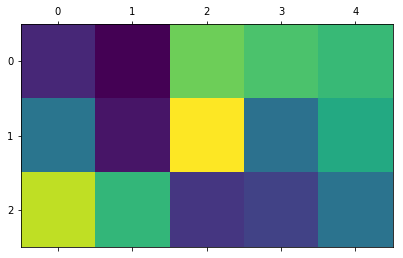

In [67]:
plt.matshow(a)

In [68]:
np.mean(a, axis = 1).shape

(3,)

In [69]:
mats = [
    (a, "a"),
    (np.mean(a, axis = 1), "mean on axis 1 (plain)"),
    (np.mean(a, axis = 1)[:, np.newaxis], "mean on axis 1 with newaxis")    
]

for (m, label) in mats:
    print(label)
    print(m.shape)

a
(3, 5)
mean on axis 1 (plain)
(3,)
mean on axis 1 with newaxis
(3, 1)


In [55]:
a -= np.mean(a, axis = 1)[:, np.newaxis]

In [56]:
a

array([[ 0.02848973, -0.25055836, -0.37121392,  0.53940924,  0.0538733 ],
       [-0.16938451,  0.13595493, -0.31083477, -0.05804341,  0.40230775],
       [ 0.04724052, -0.37614297,  0.1764266 ,  0.31517951, -0.16270366]])

In [52]:
np.mean(a, axis = 1)[:, np.newaxis]

array([[0.45116815],
       [0.41394555],
       [0.38834746]])

### Billboard Association

In [20]:
all_data.count()

billboard index    32962
billboard date     32962
artist             32960
album              32962
billboard rank     32962
length             26345
track length       24182
pitchfork index     3147
genre               3060
pitchfork score     3147
date of review      3147
author              3147
role                2788
review              3146
bnm                 3147
link                3147
hasreview          32962
dtype: int64

In [60]:
acoustics_gb = acoustics.groupby(['artist', 'album']);
bill_gb = billboard.groupby(['artist', 'album']);

In [ ]:
bill_gb.merge(acoustics_gb, )

In [3]:
# all_data = pd.read_pickle('./grouped_billboard.pkl')


### Compute SVD of acoustic data

In [33]:
acoustic_data = acoustics[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']];
acoustic_data = pd.get_dummies(acoustic_data, columns = ['mode', 'key']).dropna()
# dropped 5 rows because they had Nan values!

## Compute SVD for PCA!
(u, s, vt) = np.linalg.svd(np.asarray(acoustic_data), full_matrices = False);


`mode`: Major = 1, Minor = 0
`key`: C = 0.0, increments by half-steps up to B which is 11.0

In [31]:
print(u.shape, s.shape, vt.shape)

(339850, 24) (24,) (24, 24)


In [ ]:
sns.pairplot(acoustic_data)